In [1]:
import sys
import pandas as pd
import sklearn as sk
import tensorflow as tf
import matplotlib.pyplot as plt 
import seaborn as sns 
import time
import keras
import numpy as np
import os
import platform

/Users/harshith.nikhil/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [4]:
data = pd.read_csv("Final_News_DF_Labeled_ExamDataset.csv")
data.head()

,LABEL,according,agency,ahead,alabama,amazon,america,american,announced,appeared,...,wolverines,women,work,working,world,wrote,year,years,york,young
0,politics,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.LABEL.value_counts()

LABEL
football    500
politics    497
science     496
Name: count, dtype: int64

In [7]:
X = data.drop("LABEL",axis=1)
y = data['LABEL']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=303)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5,shuffle=True,random_state=303)

In [9]:
x_train = x_train.values
x_val = x_val.values
x_test = x_test.values

print(f"Training Set: {x_train.shape}")
print(f"Validation Set: {x_val.shape}")
print(f"Test Set: {x_test.shape}")

Training Set: (1194, 300)
Validation Set: (149, 300)
Test Set: (150, 300)


In [28]:
label_mapper = {x: i for i, x in enumerate(data.LABEL.unique(),0)}
mapped_labels = {i: x for i, x in enumerate(data.LABEL.unique(),0)}

In [16]:
y_encoded_train = y_train.map(label_mapper)
y_encoded_test = y_test.map(label_mapper)
y_encoded_val = y_val.map(label_mapper)

y_encoded_train = to_categorical(y_encoded_train)
y_encoded_test = to_categorical(y_encoded_test)
y_encoded_val = to_categorical(y_encoded_val)

In [59]:
y

0       politics
1       politics
2       politics
3       politics
4       politics
          ...   
1488     science
1489     science
1490     science
1491     science
1492     science
Name: LABEL, Length: 1493, dtype: object

In [60]:
y_encoded_train

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [20]:
ann = Sequential()
ann.add(Dense(128, activation="relu"))
ann.add(Dense(64, activation="relu"))
ann.add(Dropout(0.5)) 
ann.add(Dense(16, activation="relu"))
ann.add(Dropout(0.5)) 
ann.add(Dense(3, activation="softmax")) 
ann._name = "ANN_1"
ann.build(x_train.shape)
ann.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [21]:
ann.summary(show_trainable=True,expand_nested=True)

Model: "ANN_1"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 dense_4 (Dense)             (1194, 128)               38528     Y          
                                                                            
 dense_5 (Dense)             (1194, 64)                8256      Y          
                                                                            
 dropout_2 (Dropout)         (1194, 64)                0         Y          
                                                                            
 dense_6 (Dense)             (1194, 16)                1040      Y          
                                                                            
 dropout_3 (Dropout)         (1194, 16)                0         Y          
                                                                            
 dense_7 (Dense)             (1194, 3)                 51    

In [12]:
early_stop = EarlyStopping(monitor='val_accuracy', 
                                    patience=5, 
                                    mode='max', 
                                    verbose=1, 
                                    restore_best_weights=True)

In [13]:
model_times={}

In [22]:
start = time.time()
ann_history = ann.fit(x=x_train, y=y_encoded_train, 
              validation_data=(x_val, y_encoded_val), 
              epochs=25,
              callbacks=[early_stop])


elapsed_time = time.time() - start
model_times[ann._name] = elapsed_time

Epoch 1/25
38/38 [==============================] - 1s 9ms/step - loss: 1.0839 - accuracy: 0.3987 - val_loss: 0.9498 - val_accuracy: 0.5302
Epoch 2/25
38/38 [==============================] - 0s 7ms/step - loss: 0.9482 - accuracy: 0.5377 - val_loss: 0.8494 - val_accuracy: 0.6846
Epoch 3/25
38/38 [==============================] - 0s 7ms/step - loss: 0.8525 - accuracy: 0.6097 - val_loss: 0.7619 - val_accuracy: 0.7315
Epoch 4/25
38/38 [==============================] - 0s 7ms/step - loss: 0.7772 - accuracy: 0.6466 - val_loss: 0.6863 - val_accuracy: 0.7651
Epoch 5/25
38/38 [==============================] - 0s 7ms/step - loss: 0.6934 - accuracy: 0.6968 - val_loss: 0.6384 - val_accuracy: 0.7450
Epoch 6/25
38/38 [==============================] - 0s 7ms/step - loss: 0.6204 - accuracy: 0.7454 - val_loss: 0.6010 - val_accuracy: 0.7584
Epoch 7/25
38/38 [==============================] - 0s 7ms/step - loss: 0.5746 - accuracy: 0.7605 - val_loss: 0.5997 - val_accuracy: 0.7584
Epoch 8/25
38/38 [==

In [24]:
def plot_metric_epochs(model_history, name, epochs, metric="accuracy"):
    model_history = pd.DataFrame(model_history.history)
    metric = metric.lower()
    plt.figure(figsize=(10,5))
    sns.lineplot(x=range(model_history.shape[0]), y=f"{metric}", data=model_history, color="blue",
                 label=f"{metric.capitalize()}")
    plt.legend()
    sns.lineplot(x=range(model_history.shape[0]), y=f"val_{metric}", data=model_history, color="red",
                 marker='o', 
                 label=f'Validation {metric.capitalize()}')
    if model_history.shape[0]<epochs:
        plt.axvline(x=model_history.shape[0]-5, color='gray', linestyle='--', label='Early Stopping')
    plt.xlim(0, epochs)
    plt.title(f"{name} - {metric.capitalize()} History", size=15)
    plt.xlabel("Epochs")
    plt.ylabel(f"{metric.capitalize()}")
    plt.legend(loc='best')
    plt.show()

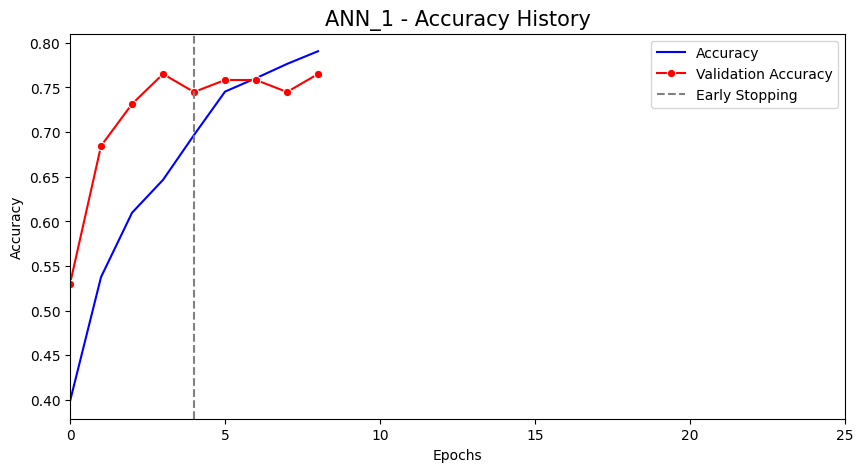

In [25]:
plot_metric_epochs(ann_history, ann._name, epochs=25, metric="accuracy")

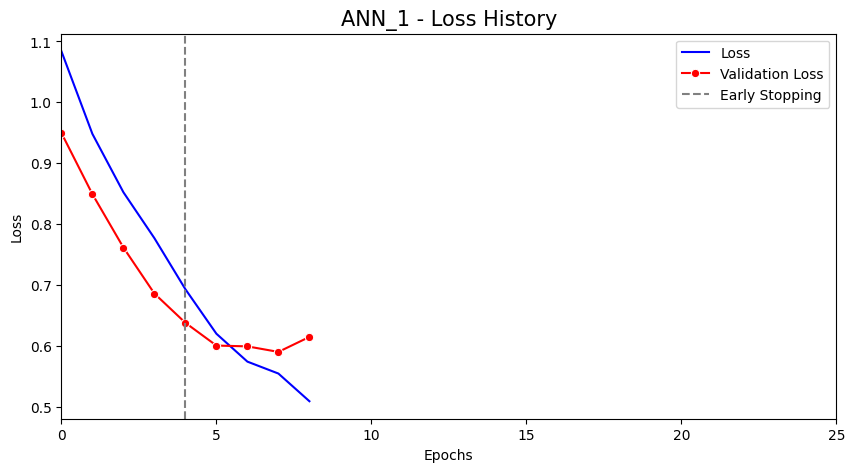

In [26]:
plot_metric_epochs(ann_history, ann._name, epochs=25, metric="loss")

In [30]:
ann_preds = ann.predict(x_test)

5/5 [==============================] - 0s 4ms/step


In [31]:
def map_preds(preds, mapped_labels):
    return np.array([mapped_labels[pred] for pred in preds.argmax(axis=1)])

In [32]:
y_pred = map_preds(ann_preds, mapped_labels)
ann_matrix = confusion_matrix(y_test, y_pred)

In [35]:
def plot_cm(cm, name, mapped_labels):
    labels = list(mapped_labels.values())
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', 
                fmt='d', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{name} - Confusion Matrix')
    plt.show()

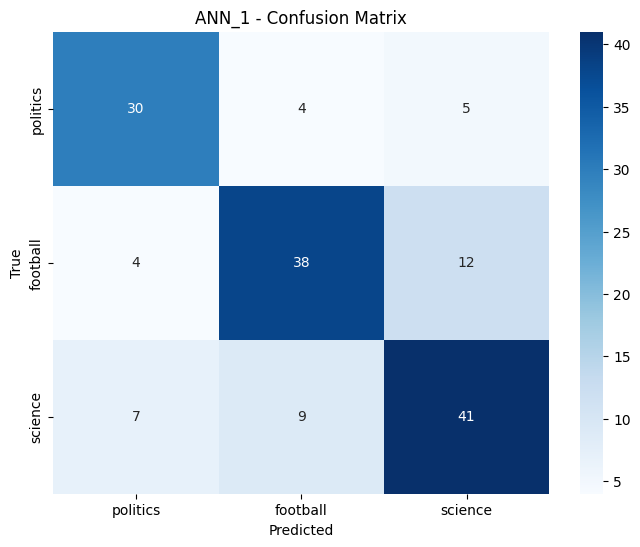

In [36]:
plot_cm(ann_matrix, ann._name, mapped_labels)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    football       0.73      0.77      0.75        39
    politics       0.75      0.70      0.72        54
     science       0.71      0.72      0.71        57

    accuracy                           0.73       150
   macro avg       0.73      0.73      0.73       150
weighted avg       0.73      0.73      0.73       150



In [38]:
sequence_length = 300
num_features = 1 

cnn = Sequential()

cnn.add(Embedding(input_dim=sequence_length, output_dim=64, input_length=sequence_length))
cnn.add(MaxPooling1D(pool_size=2))

cnn.add(Conv1D(32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling1D(pool_size=2))

cnn.add(Conv1D(16, kernel_size=3, activation='relu'))
cnn.add(MaxPooling1D(pool_size=2))

cnn.add(Conv1D(8, kernel_size=3, activation='relu'))
cnn.add(MaxPooling1D(pool_size=2))

cnn.add(Flatten())
cnn.add(Dropout(0.5))

cnn.add(Dense(3, activation='softmax'))

In [39]:
cnn._name = "CNN"
cnn.summary(show_trainable=True)

Model: "CNN"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 embedding (Embedding)       (None, 300, 64)           19200     Y          
                                                                            
 max_pooling1d (MaxPooling1  (None, 150, 64)           0         Y          
 D)                                                                         
                                                                            
 conv1d (Conv1D)             (None, 148, 32)           6176      Y          
                                                                            
 max_pooling1d_1 (MaxPoolin  (None, 74, 32)            0         Y          
 g1D)                                                                       
                                                                            
 conv1d_1 (Conv1D)           (None, 72, 16)            1552    

In [40]:
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics='accuracy')

In [43]:
start = time.time()
cnn_history = cnn.fit(x=x_train, y=y_encoded_train, 
              validation_data=(x_val, y_encoded_val), 
              epochs=25,
              callbacks=[early_stop])

elapsed_time = time.time() - start
model_times[cnn._name] = elapsed_time

Epoch 1/25
38/38 [==============================] - 2s 20ms/step - loss: 1.0991 - accuracy: 0.3417 - val_loss: 1.0969 - val_accuracy: 0.3154
Epoch 2/25
38/38 [==============================] - 0s 10ms/step - loss: 1.0953 - accuracy: 0.3501 - val_loss: 1.0882 - val_accuracy: 0.4295
Epoch 3/25
38/38 [==============================] - 0s 9ms/step - loss: 1.0829 - accuracy: 0.3911 - val_loss: 1.0514 - val_accuracy: 0.4295
Epoch 4/25
38/38 [==============================] - 0s 9ms/step - loss: 1.0495 - accuracy: 0.4238 - val_loss: 1.0074 - val_accuracy: 0.4497
Epoch 5/25
38/38 [==============================] - 0s 9ms/step - loss: 1.0238 - accuracy: 0.4623 - val_loss: 0.9584 - val_accuracy: 0.5235
Epoch 6/25
38/38 [==============================] - 0s 9ms/step - loss: 1.0068 - accuracy: 0.4765 - val_loss: 0.9223 - val_accuracy: 0.5638
Epoch 7/25
38/38 [==============================] - 0s 9ms/step - loss: 0.9696 - accuracy: 0.4992 - val_loss: 0.8911 - val_accuracy: 0.5705
Epoch 8/25
38/38 [

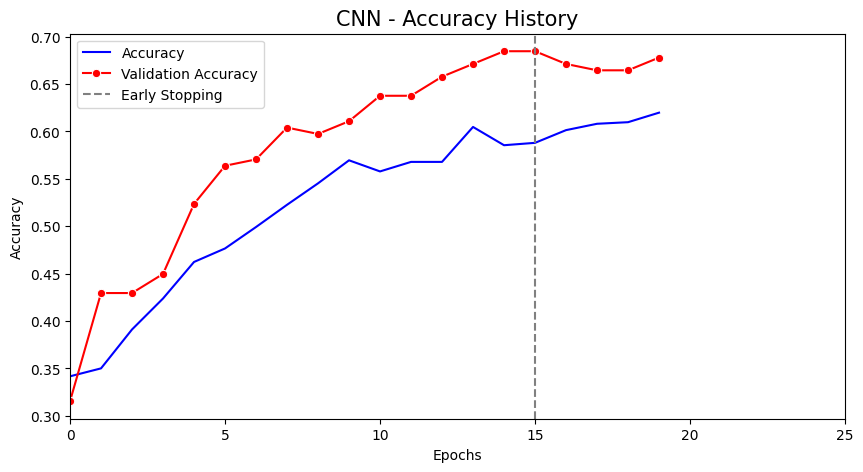

In [44]:
plot_metric_epochs(cnn_history, cnn._name,  epochs=25, metric="accuracy")

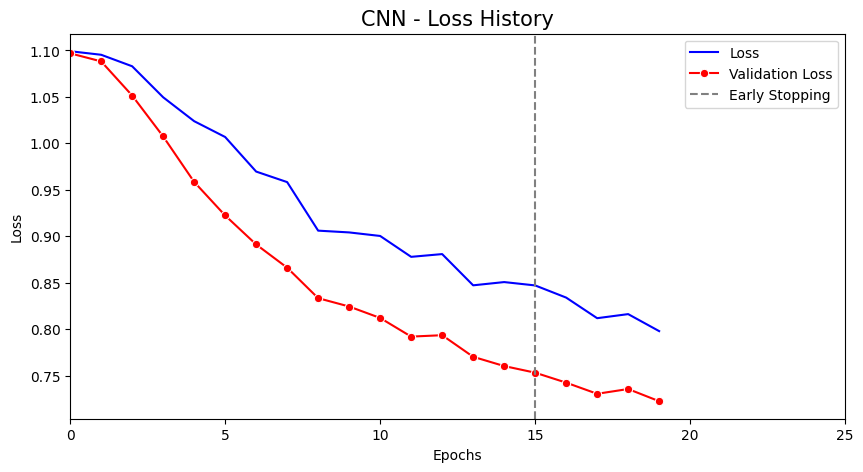

In [45]:
plot_metric_epochs(cnn_history, cnn._name,  epochs=25, metric="loss")

In [46]:
cnn_preds = cnn.predict(x_test)

5/5 [==============================] - 0s 7ms/step


In [47]:
y_pred = map_preds(cnn_preds, mapped_labels)
cnn_matrix = confusion_matrix(y_test, y_pred)

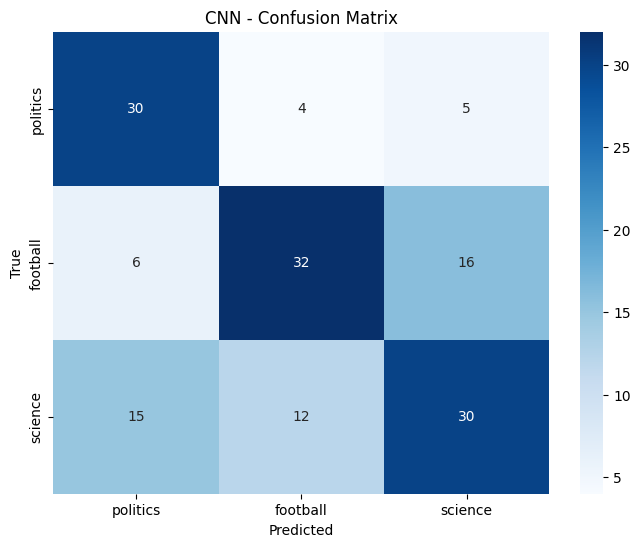

In [48]:
plot_cm(cnn_matrix, cnn._name, mapped_labels)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    football       0.59      0.77      0.67        39
    politics       0.67      0.59      0.63        54
     science       0.59      0.53      0.56        57

    accuracy                           0.61       150
   macro avg       0.61      0.63      0.62       150
weighted avg       0.62      0.61      0.61       150



In [50]:
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=sequence_length, output_dim=64, input_length=sequence_length))
lstm_model.add(Bidirectional(LSTM(64)))
lstm_model.add(Dense(3, activation="softmax"))
lstm_model._name = "LSTM"

In [51]:
lstm_model.summary(show_trainable=True)

Model: "LSTM"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 embedding_1 (Embedding)     (None, 300, 64)           19200     Y          
                                                                            
 bidirectional (Bidirection  (None, 128)               66048     Y          
 al)                                                                        
                                                                            
 dense_9 (Dense)             (None, 3)                 387       Y          
                                                                            
Total params: 85635 (334.51 KB)
Trainable params: 85635 (334.51 KB)
Non-trainable params: 0 (0.00 Byte)
____________________________________________________________________________


In [52]:
lstm_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy',"AUC"])

In [53]:
start = time.time()
lstm_history = lstm_model.fit(x=x_train, y=y_encoded_train, 
              validation_data=(x_val, y_encoded_val), 
              epochs=25,
              callbacks=[early_stop])


elapsed_time = time.time() - start
model_times[lstm_model._name] = elapsed_time

Epoch 1/25
38/38 [==============================] - 4s 57ms/step - loss: 1.1004 - accuracy: 0.3333 - auc: 0.5043 - val_loss: 1.0984 - val_accuracy: 0.3087 - val_auc: 0.5108
Epoch 2/25
38/38 [==============================] - 1s 37ms/step - loss: 1.0989 - accuracy: 0.3333 - auc: 0.4997 - val_loss: 1.0985 - val_accuracy: 0.3087 - val_auc: 0.5047
Epoch 3/25
38/38 [==============================] - 1s 36ms/step - loss: 1.0984 - accuracy: 0.3518 - auc: 0.5144 - val_loss: 1.0985 - val_accuracy: 0.3826 - val_auc: 0.5585
Epoch 4/25
38/38 [==============================] - 1s 36ms/step - loss: 1.0957 - accuracy: 0.3987 - auc: 0.5615 - val_loss: 1.0822 - val_accuracy: 0.3691 - val_auc: 0.6166
Epoch 5/25
38/38 [==============================] - 1s 36ms/step - loss: 1.0846 - accuracy: 0.3786 - auc: 0.5641 - val_loss: 1.0504 - val_accuracy: 0.4094 - val_auc: 0.6418
Epoch 6/25
38/38 [==============================] - 1s 36ms/step - loss: 1.0502 - accuracy: 0.4070 - auc: 0.6114 - val_loss: 0.9466 - v

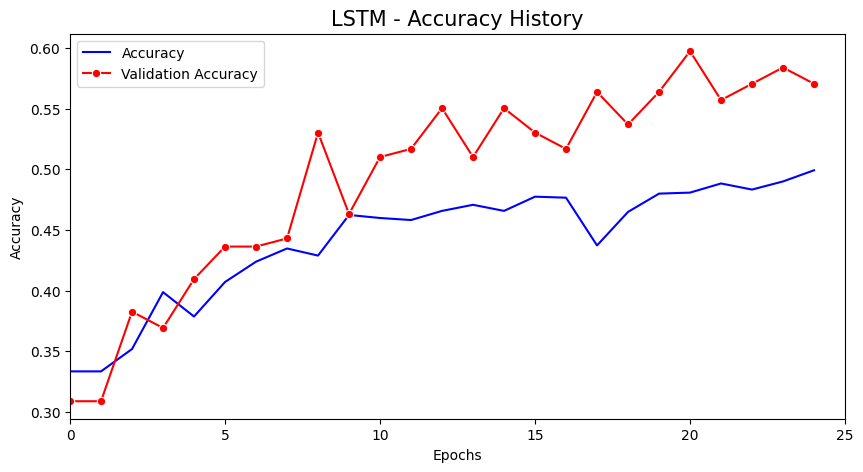

In [54]:
plot_metric_epochs(lstm_history, lstm_model._name,  epochs=25, metric="accuracy")

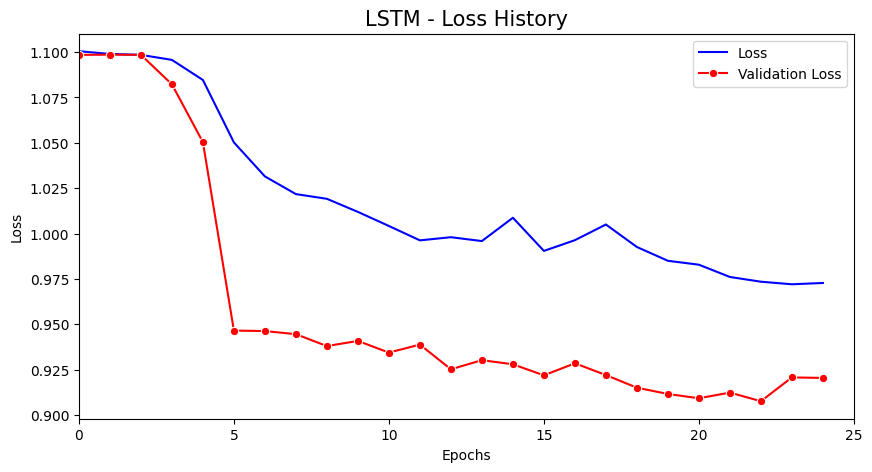

In [55]:
plot_metric_epochs(lstm_history, lstm_model._name,  epochs=25, metric="loss")

In [56]:
lstm_preds = lstm_model.predict(x_test)

5/5 [==============================] - 0s 34ms/step


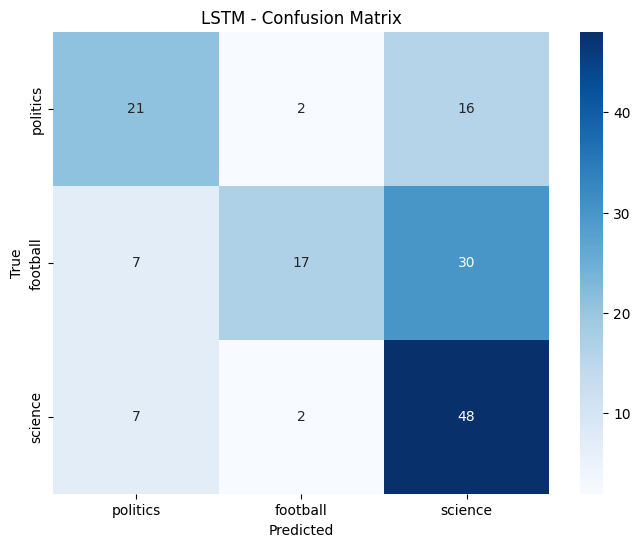

In [57]:
y_pred = map_preds(lstm_preds, mapped_labels)
lstm_matrix = confusion_matrix(y_test, y_pred)
plot_cm(lstm_matrix, lstm_model._name, mapped_labels)

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    football       0.60      0.54      0.57        39
    politics       0.81      0.31      0.45        54
     science       0.51      0.84      0.64        57

    accuracy                           0.57       150
   macro avg       0.64      0.57      0.55       150
weighted avg       0.64      0.57      0.55       150



In [58]:
model_times

{'ANN_1': 2.6462440490722656,
 'CNN': 8.967911958694458,
 'LSTM': 36.98523497581482}